Shri Ramdeobaba College of Engineering and Management, Nagpur

Name: Yash Patni

Roll No.:71

Sec: A

Subject : Design Analysis and Algorithms Lab

Practical No. : 03

Aim: Perform Fractional Knapsack for the given scenario.

Problem Definition: Suppose you are a transport dealer and want to load a truck
with different types of boxes. Assume there are 50 types of boxes (Box-1 to Box-50),
which weigh different and that the truck has a maximum capacity (truckSize). Each
box has a profit value associated with it. It is the commission that the transporter
will receive after transporting the box. You can choose any box to put on the truck as
long as the number of boxes does not exceed truckSize.

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

def fractional_knapsack(weights, profits, truck_size, method):
    ratios = np.divide(profits, weights)
    n = len(weights)

    indices = list(range(n))
    for i in range(n - 1):
        for j in range(0, n - i - 1):
            if method == 'minimum_weight':
                if weights[indices[j]] > weights[indices[j + 1]]:
                    indices[j], indices[j + 1] = indices[j + 1], indices[j]
            elif method == 'maximum_profit':
                if profits[indices[j]] < profits[indices[j + 1]]:
                    indices[j], indices[j + 1] = indices[j + 1], indices[j]
            elif method == 'profit_weight_ratio':
                if ratios[indices[j]] < ratios[indices[j + 1]]:
                    indices[j], indices[j + 1] = indices[j + 1], indices[j]

    total_profit = 0
    truck_load = np.zeros(n)
    included_weights = []
    included_profits = []

    for i in indices:
        if weights[i] <= truck_size:
            truck_load[i] = 1
            total_profit += profits[i]
            truck_size -= weights[i]
            included_weights.append(weights[i])
            included_profits.append(profits[i])
        else:
            truck_load[i] = truck_size / weights[i]
            total_profit += truck_load[i] * profits[i]
            included_weights.append(weights[i])
            included_profits.append(profits[i] * truck_load[i])
            break

    return total_profit, truck_load, included_weights, included_profits

def compute_time(weights, profits, truck_size, method):
    start_time = time.time()
    total_profit, _, _, _ = fractional_knapsack(weights, profits, truck_size, method)
    end_time = time.time()
    return total_profit, end_time - start_time

<ipython-input-1-b0bea0a623d7>:6: RuntimeWarning: divide by zero encountered in divide
  ratios = np.divide(profits, weights)


Total profit using minimum_weight: 6265.745762711865
Included weights using minimum_weight: [0, 0, 0, 0, 2, 3, 3, 4, 6, 7, 7, 8, 9, 11, 13, 15, 18, 18, 20, 22, 26, 29, 29, 30, 31, 32, 36, 42, 42, 44, 47, 48, 52, 52, 55, 56, 59]
Included profits using minimum_weight: [83, 600, 17, 33, 514, 48, 36, 28, 42, 360, 78, 147, 63, 230, 312, 78, 892, 87, 19, 130, 92, 50, 15, 59, 274, 35, 38, 256, 120, 78, 164, 110, 432, 276, 22, 73, 374.74576271186436]

Total profit using maximum_profit: 7076.083333333333
Included weights using maximum_profit: [18, 59, 0, 2, 52, 80, 65, 7, 84, 13, 52, 31, 42, 11, 71, 66, 47, 8, 22, 64, 42, 48]
Included profits using maximum_profit: [892, 670, 600, 514, 432, 431, 389, 360, 323, 312, 276, 274, 256, 230, 210, 189, 164, 147, 130, 125, 120, 32.083333333333336]

Total profit using profit_weight_ratio: 7566.857142857143
Included weights using profit_weight_ratio: [0, 0, 0, 0, 2, 7, 18, 13, 11, 8, 3, 3, 59, 7, 31, 52, 9, 6, 4, 42, 65, 22, 80, 52, 15, 18, 84, 26, 47, 71,

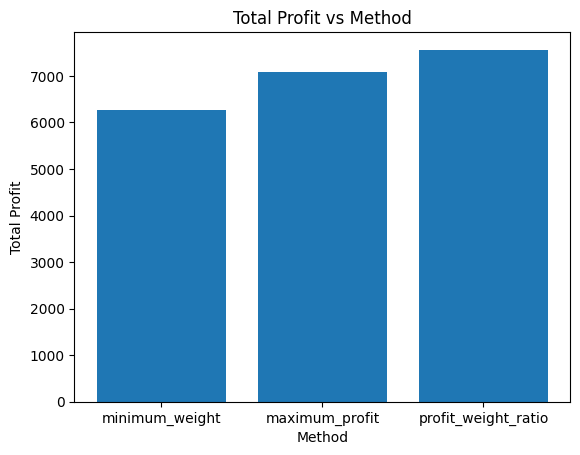

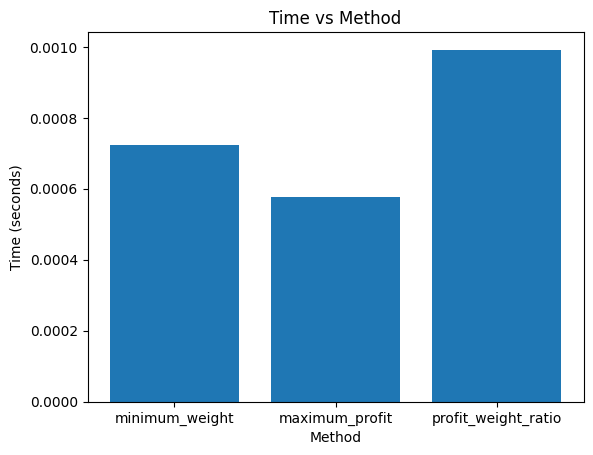

In [ ]:
truck_size = 850
weights = [7, 0, 30, 22, 80, 94, 11, 81, 70, 64, 59, 18, 0, 36, 3, 8, 15, 42, 9, 0, 42, 47, 52, 32, 26, 48, 55, 6, 29, 84, 2, 4, 18, 56, 7, 29,
           93, 44, 71, 3, 86, 66, 31, 65, 0, 79, 20, 65, 52, 13]
profits = [360, 83, 59, 130, 431, 67, 230, 52, 93, 125, 670, 892, 600, 38, 48, 147, 78, 256, 63, 17, 120,
           164, 432, 35, 92, 110, 22, 42, 50, 323, 514, 28, 87, 73, 78, 15, 26, 78, 210, 36, 85, 189, 274, 43, 33, 10, 19, 389, 276, 312]

# Compute total profit, time, and included items for each method
methods = ['minimum_weight', 'maximum_profit', 'profit_weight_ratio']
total_profits = []
times = []
included_items = []

for method in methods:
    total_profit, time_taken = compute_time(weights, profits, truck_size, method)
    total_profits.append(total_profit)
    times.append(time_taken)

    _, _, included_weights, included_profits = fractional_knapsack(weights, profits, truck_size, method)
    included_items.append((method, included_weights, included_profits))

    print(f"Total profit using {method}: {total_profit}")
    print(f"Included weights using {method}: {included_weights}")
    print(f"Included profits using {method}: {included_profits}\n")


best_method = methods[np.argmax(total_profits)]
print(f"The best method is: {best_method}")

# Plot the graph
plt.bar(methods, total_profits)
plt.xlabel('Method')
plt.ylabel('Total Profit')
plt.title('Total Profit vs Method')
plt.show()

plt.bar(methods, times)
plt.xlabel('Method')
plt.ylabel('Time (seconds)')
plt.title('Time vs Method')
plt.show()